##Estatística em Python:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scp



In [3]:
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do scipy -> %s' % scp.__version__)

Versão do pandas -> 1.1.5
Versão do numpy -> 1.19.5
Versão do seaborn -> 0.11.2
Versão do scipy -> 1.4.1


### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

##Importando pandas e lendo o dataset do projeto

In [4]:
dados = pd.read_csv("dados.csv")

In [5]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0.0,23.0,8.0,12.0,800.0,1.603808
1,11,1.0,23.0,2.0,12.0,1150.0,1.739790
2,11,1.0,35.0,8.0,15.0,880.0,1.760444
3,11,0.0,46.0,2.0,6.0,3500.0,1.783158
4,11,1.0,47.0,8.0,9.0,150.0,1.690631


In [6]:
sorted(dados['Anos de Estudo'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 nan]

In [7]:
#Descobrindo os pontos mais altos e mais baixos
print(dados['Idade'].min())
dados['Idade'].max()

13.0


99.0

In [8]:
#Distribuição de variáveis:
dados['Sexo'].value_counts()

0.0    82124
1.0    36258
Name: Sexo, dtype: int64

In [9]:
#Para uma compreensão percentual mais apurada:
dados['Sexo'].value_counts(normalize = True)

#69% são homens e 30% são mulheres.

0.0    0.69372
1.0    0.30628
Name: Sexo, dtype: float64

In [10]:
#De uma forma mais adequada:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize = True) * 100

dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [11]:
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0.0,82124,69.372033
1.0,36258,30.627967


In [12]:
#Renomeando o Index para os sexos e a coluna do index:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)

dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,82124,69.372033
Feminino,36258,30.627967


In [13]:
#Entendendo distribuição cruzada:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [14]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)

frequencia.rename(index= sexo, inplace=True)
frequencia.rename(columns= cor, inplace= True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,325,38349,7996,429,35025
Feminino,141,16640,4212,196,15069


In [15]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize= True)

percentual.rename(index= sexo, inplace=True)
percentual.rename(columns= cor, inplace= True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.002745,0.323943,0.067544,0.003624,0.295864
Feminino,0.001191,0.140562,0.035580,0.001656,0.127291


In [16]:
#Observado o cruzamento entre variáveis:
#Os valores obtidos correspondem à renda de cada etnia e sexo do dataframe
percentual = pd.crosstab(dados.Sexo, dados.Cor, aggfunc= "mean", values = dados.Renda)

percentual.rename(index= sexo, inplace=True)
percentual.rename(columns= cor, inplace= True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1191.138462,3032.73191,1704.096423,4801.668998,1766.989493
Feminino,3173.581560,2163.83768,1197.079772,3356.989796,1230.091512


#Variáveis quantitativas

In [17]:
dados.Renda.min()

0.0

In [18]:
dados.Renda.max()

200000.0

In [19]:
classes = [0, 1576, 3152, 7880, 15770, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [20]:
#Criar agora a relação entre as classes economicas e as classificações das rendas:
pd.cut(x= dados.Renda, bins = classes, labels=labels, include_lowest=True).head()

0    E
1    E
2    E
3    C
4    E
Name: Renda, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [21]:
#em uma forma mais palatável:
frequencia = pd.value_counts(pd.cut(x= dados.Renda, bins = classes, labels=labels, include_lowest=True))
frequencia

E    72470
D    28304
C    12765
B     3771
A     1072
Name: Renda, dtype: int64

In [22]:
#Em percentual:
percentual = pd.value_counts(pd.cut(x= dados.Renda, bins = classes, labels=labels, include_lowest=True), normalize = True)
percentual

E    0.612171
D    0.239090
C    0.107829
B    0.031855
A    0.009055
Name: Renda, dtype: float64

In [23]:
dist_freq_quantitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitativas

,Frequência,Porcentagem (%)
E,72470,0.612171
D,28304,0.239090
C,12765,0.107829
B,3771,0.031855
A,1072,0.009055


In [24]:
#Invertendo a ordem de amostragem:
dist_freq_quantitativas.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,1072,0.009055
B,3771,0.031855
C,12765,0.107829
D,28304,0.239090
E,72470,0.612171


#Trabalhando com Histogramas:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


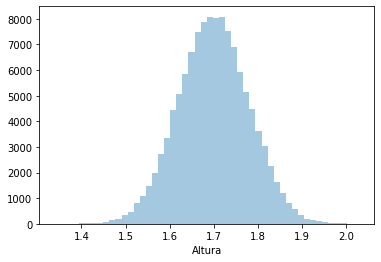

In [25]:
ax = sns.distplot(dados.Altura, kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


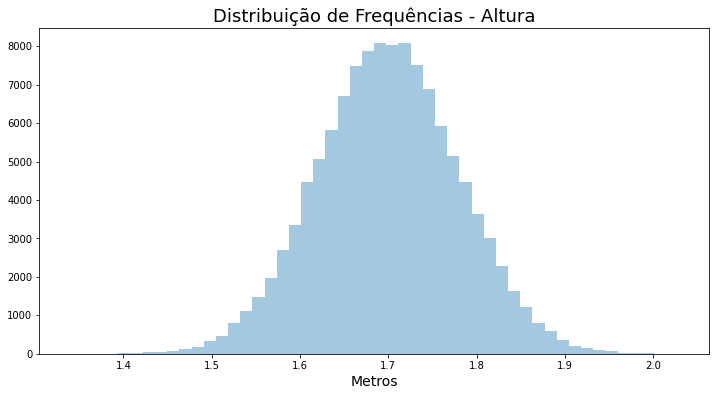

In [26]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


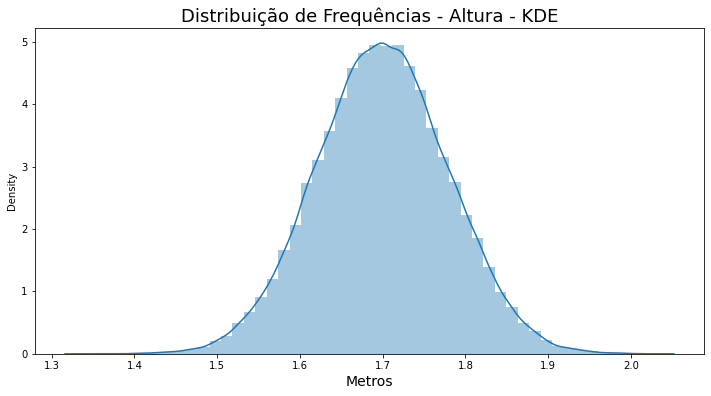

In [27]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

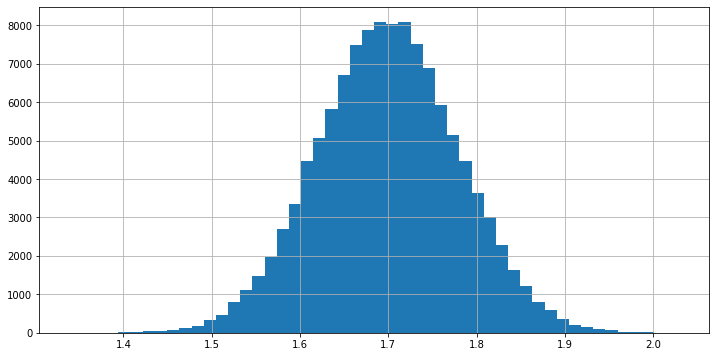

In [28]:
dados.Altura.hist(bins = 50, figsize=(12,6))

## Medidas de tendências centrais

Média:

In [29]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


Calculando a média aritmética das matérias:

In [30]:
df['Fulano'].mean()

7.714285714285714

In [31]:
df['Sicrano'].mean()

7.714285714285714

In [32]:
df['Beltrano'].mean()

5.142857142857143

In [33]:
dados.Renda.mean()

2153.6558513963273

Abaixo poderiamos calcular a partir de uma medida especifica todas as outras variáveis:

In [34]:
dados.groupby(['Sexo']).mean()

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
0.0,34.744910,44.162096,4.766646,9.378184,2365.496493,1.699420
1.0,34.735424,44.186717,4.739809,10.412157,1673.838960,1.699686


Porém, também podemos medir a partir de uma variável apenas:

In [35]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0.0    2365.496493
1.0    1673.838960
Name: Renda, dtype: float64

Mediana:

In [36]:
notas_fulano = df.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

odernando:

In [37]:
notas_fulano = notas_fulano.sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [38]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


a mediana no pandas é pelo método median():

In [39]:
notas_fulano.median()

Fulano    8.0
dtype: float64

In [40]:
notas_beltrano = df.Beltrano
notas_beltrano = notas_beltrano.reset_index()
notas_beltrano.median()

Beltrano    3.0
dtype: float64

Para pegar a mediana total:

In [41]:
dados.median()

UF                  35.000000
Sexo                 0.000000
Idade               44.000000
Cor                  4.000000
Anos de Estudo      11.000000
Renda             1300.000000
Altura               1.699255
dtype: float64

Moda:

In [42]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [43]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])
exemplo.mode()

0    2
1    4
2    6
dtype: int64

Relações entre as medidas de tendencia central:
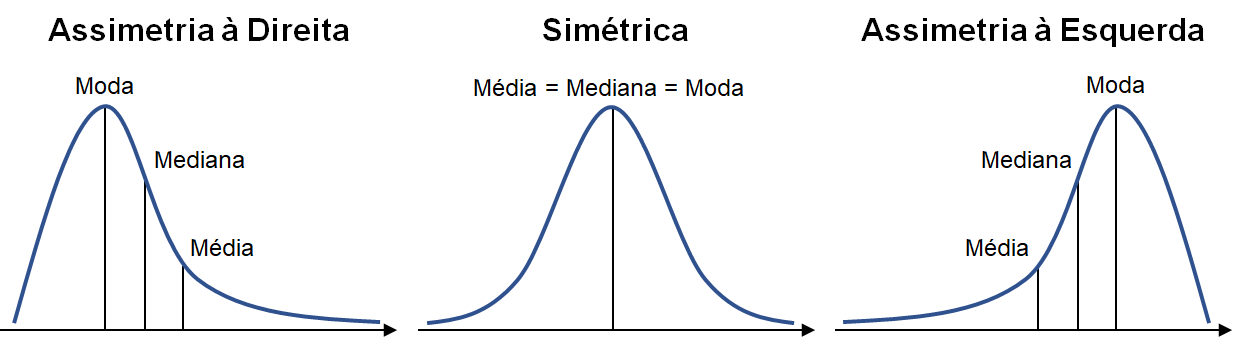

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


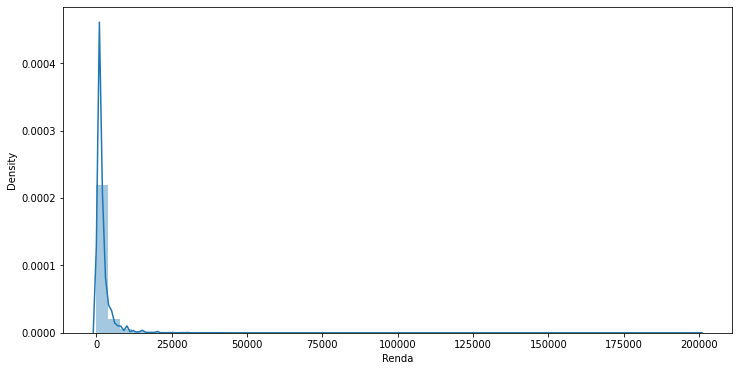

In [44]:
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(12, 6)
ax

observando de uma forma melhor a Renda do primeiro dataset:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


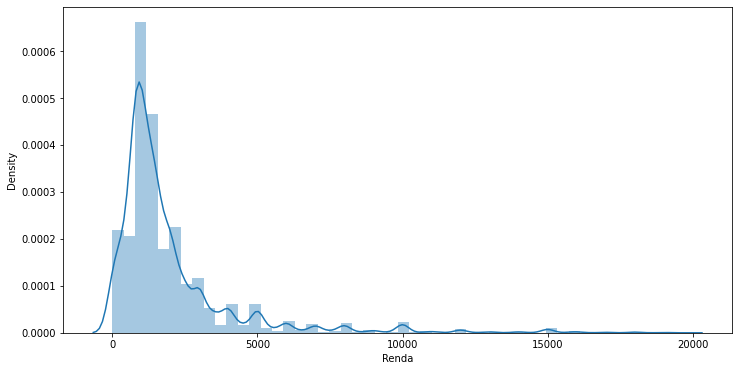

In [45]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

Observe que se calcularmos a media, a mediana e a moda teremos uma correspondencia decrescente: moda < mediana < media

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


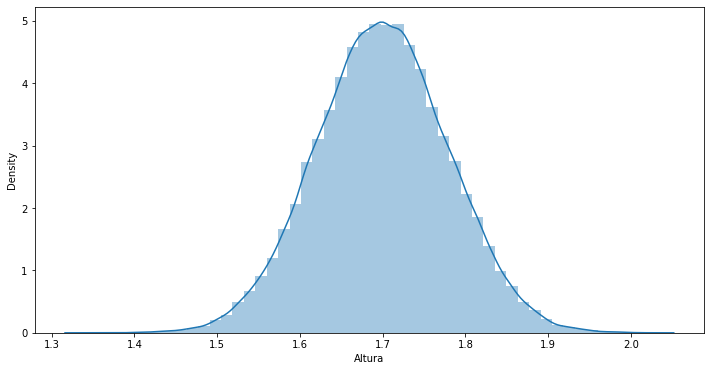

In [46]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax

Note bem os valores da media, mediana e moda:

In [47]:
Moda = dados.Altura.mode()
Moda

0    1.708163
1    1.708370
2    1.753842
dtype: float64

In [48]:
Mediana = dados.Altura.median()
Mediana

1.6992554100000001

In [49]:
Media = dados.Altura.mean()
Media

1.6995012310461965

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


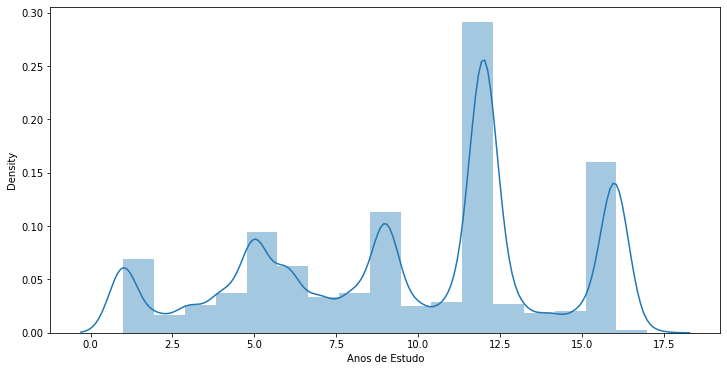

In [50]:
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12, 6)
ax

Se considerarmos somente os picos, encontraremos um comportamento bastante parecido com o padrão de Assimetria à Esquerda, pois os maiores picos aparecem conforme os valores do eixo "x" sobem.

In [51]:
Moda = dados['Anos de Estudo'].mode()
Moda

0    12.0
dtype: float64

In [52]:
Mediana = dados['Anos de Estudo'].median()
Mediana

11.0

In [53]:
Media = dados['Anos de Estudo'].mean()
Media

9.694869152404927

Portanto, note que se dá como assemetria a esquerda: media > mediana > moda

## Medidas separatrizes:

Quartis: divide a variável em quatro partes iguais quanto ao número de elementos de cada uma;

Decis: divide em dez partes iguais;

Percentis: divide em cem partes iguais.

In [54]:
dados.Renda.quantile()

1300.0

Para os quartis:

In [55]:
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     800.0
0.50    1300.0
0.75    2200.0
Name: Renda, dtype: float64

Para os decis:


In [56]:
dados.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     400.0
0.2     788.0
0.3     900.0
0.4    1094.0
0.5    1300.0
0.6    1500.0
0.7    2000.0
0.8    2600.0
0.9    4200.0
Name: Renda, dtype: float64

Para percentis:

In [57]:
dados.Renda.quantile([i / 100 for i in range(1, 99)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04      100.0
0.05      200.0
         ...   
0.94     6000.0
0.95     7000.0
0.96     8000.0
0.97     9500.0
0.98    10857.6
Name: Renda, Length: 98, dtype: float64

Visualizando os centis com o gráfico Dados em Idade:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


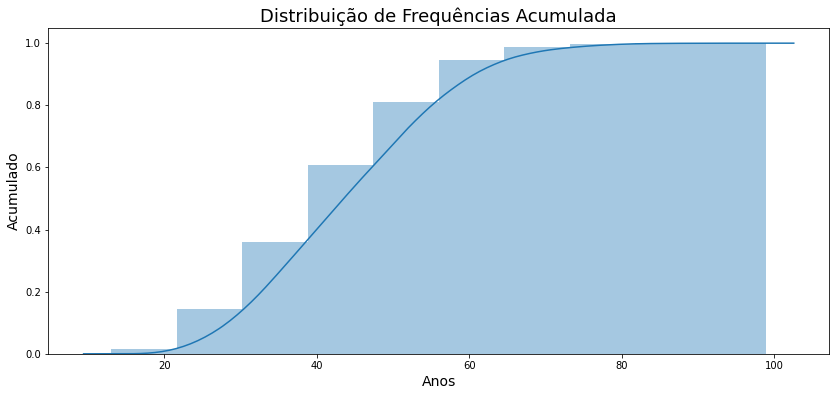

In [58]:
#Em gráfico:

ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True},
                  bins = 10)
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

Boxplot:

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por  IIQ . As posições relativas de  Q1 ,  Mediana  e  Q3  dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

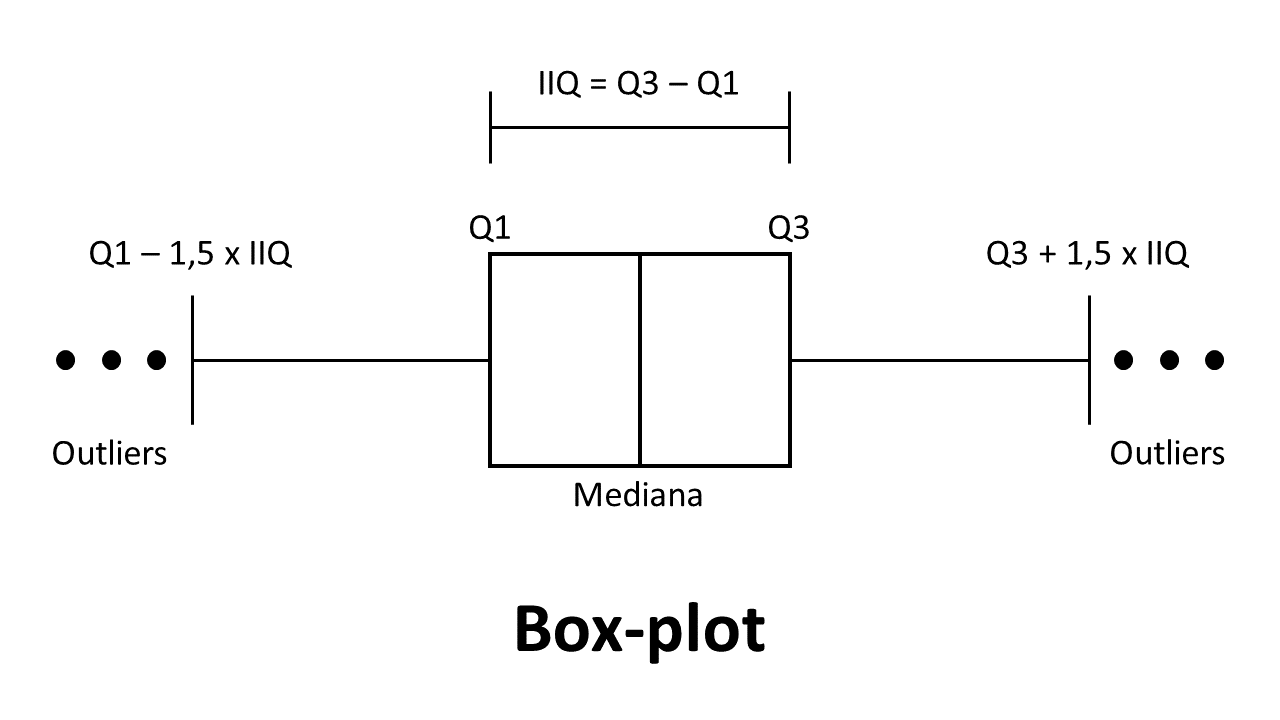

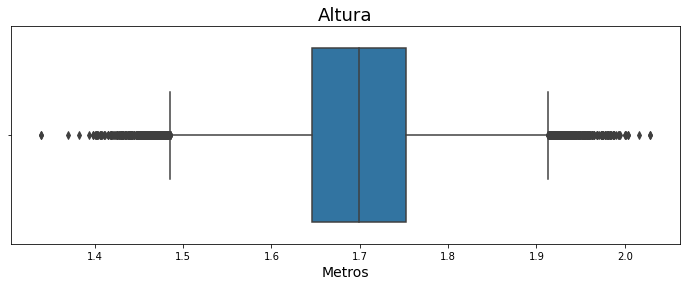

In [59]:
ax = sns.boxplot( x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

Ainda é possível utilizar duas variáveis para comparação mais clara:

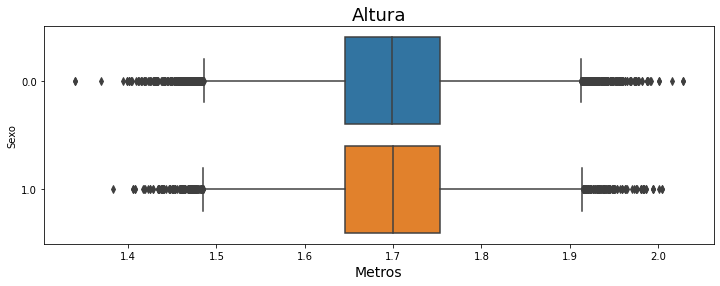

In [60]:
ax = sns.boxplot( x = 'Altura', y= "Sexo", data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

Observando as medidas centrais com uma variável mais "tranquila":

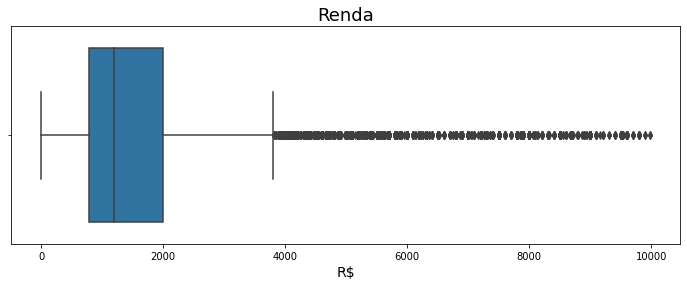

In [61]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

O boxplot segue a mesma lógica imagética que as assimetrias: ou seja, se for uma assimetria esquerda é porque a média é menor que a mediana e a moda e vice-versa para simetria e assimetria direita.

Um caso interessante de análise de dados reais com boxplot:

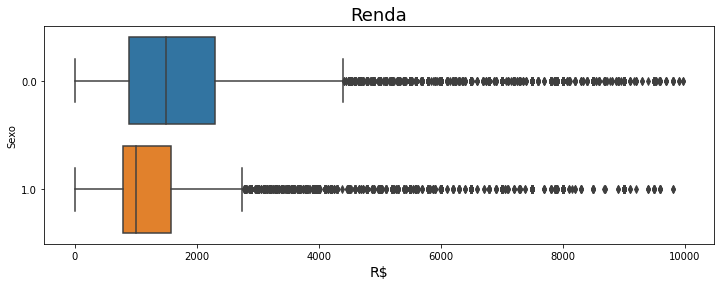

In [62]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

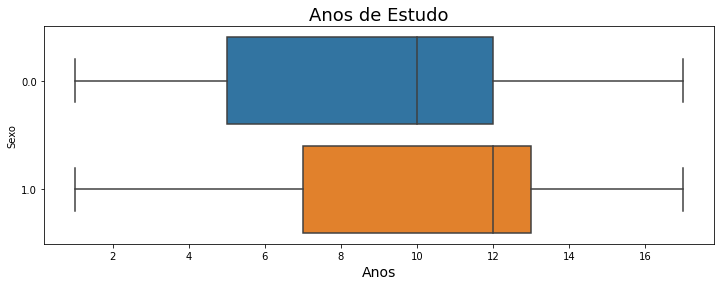

In [63]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

Pelos dados observados, as mulheres ganham menos em renda mas levam maior tempo de estudo o que demonstra a desigualdade salarial.

## Medidas de Dispersão

Desvio médio absoluto

In [66]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [67]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [68]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [69]:
#Para deixar em absoluto, sem valores negativos, visto que o desvio padrão é um valor absoluto:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [72]:
#Agora, a fórmula propriamente do Pandas que facilita todo esse entendimento:
#Lembrando que essa é a média do desvio absoluto.
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

1.5510204081632648

Variância:


esta Medida de Dispersão também é uma média dos desvios (como o Desvio médio absoluto), porém não é calculado somente com valores absolutos, e sim os eleva ao quadrado para não precisarem usar o sinal de negativo.

In [77]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [78]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [80]:
#Ou simplesmente, o seguinte código:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

Desvio Padrão:

Basicamente, é a raiz quadrada da variância

In [81]:
np.sqrt(variancia)

2.1380899352993947

In [82]:
#a fórmula do pandas é std():
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.1380899352993947

In [86]:
df.std()

Matérias
Fulano     2.138090
Sicrano    0.566947
dtype: float64